<a href="https://colab.research.google.com/github/Adolfo-AB/learning-machine-learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression
Implement a polynomial regression model with gradient descent

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
NUMBER_OF_SAMPLES = 600
NUMBER_OF_ITERATIONS = 150000
NUMBER_OF_FEATURES = 3

# Create training data
def cubic_func(x):
    return 3*x**3 + 2*x**2 + x + 5

x_min = -10
x_max = 10

# Generate linearly spaced X values within the range
x = np.linspace(x_min, x_max, NUMBER_OF_SAMPLES)
x_train = np.array([x, x**2, x**3]).T

# Add some random noise to the Y values
noise = np.random.normal(0, 30, size=(NUMBER_OF_SAMPLES))

# Generate Y values using the cubic function and add noise
y_train = cubic_func(x) + noise

# Standardize the input data
x_train_scaled = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)

print(f"Size of training set: X => {x_train.shape}, Y => {y_train.shape}")

Size of training set: X => (600, 3), Y => (600,)


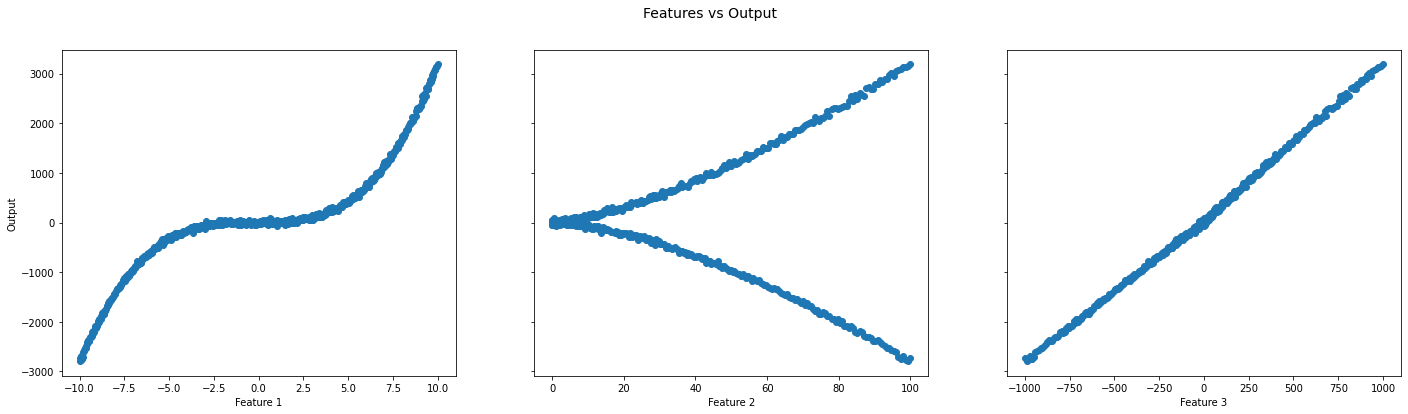

In [68]:
fig,ax=plt.subplots(1, NUMBER_OF_FEATURES, figsize=(24, 6), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(f"Feature {i+1}")
ax[0].set_ylabel("Output")
fig.suptitle("Features vs Output", fontsize=14)
plt.show()

In [69]:
def regression_model(x, slope, intercept):
  return np.dot(x, slope) + intercept

def compute_gradient(x, y, slope, intercept):
  y_predicted = regression_model(x, slope, intercept)
  error = y_predicted - y
  slope_gradient = np.mean((np.dot(error, x)))
  intercept_gradient = np.mean(error)
  cost = np.mean(error**2)/2
  return slope_gradient, intercept_gradient, cost

def gradient_descent(x, y, intercept, slope, learning_rate, num_iterations):
  converged = False
  cost_historic = []
  for i in range(num_iterations):
    slope_gradient, intercept_gradient, cost = compute_gradient(x, y, slope, intercept)
    cost_historic.append(cost)

    slope -= learning_rate*slope_gradient
    intercept -= learning_rate*intercept_gradient

    if (i > 0) and (abs(cost_historic[i]-cost_historic[i-1]) < 1e-3) and (not converged):
      converged = True
      print(f"Gradient descent converged. Iteration: {i}")

  return intercept, slope, cost_historic 

Gradient descent converged. Iteration: 16842


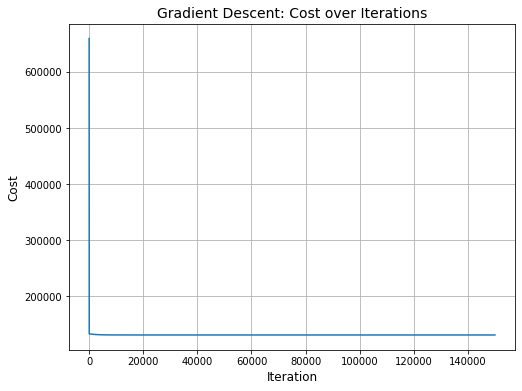

In [70]:
# Call the gradient descent function with the scaled data
intercept, slope, cost_historic = gradient_descent(x_train_scaled, y_train, np.random.randint(0,10), np.zeros(3), 0.0002, NUMBER_OF_ITERATIONS)

plt.figure(figsize=(8,6))
plt.plot(cost_historic)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Gradient Descent: Cost over Iterations', fontsize=14)
plt.grid(True)
plt.show()


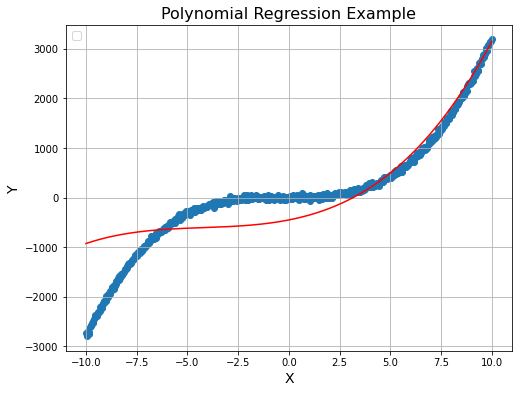

In [73]:
y_predicted = regression_model(x_train_scaled, slope, intercept)

plt.figure(figsize=(8,6))
plt.scatter(x, y_train)
plt.plot(x, y_predicted, color='red')

plt.title('Polynomial Regression Example', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

plt.show()